**OBEJECTIVES**



*   Perform Exploratory Data Analysis on the processed dataset to investigate class-wise sequence information.

*  Find out interesting conclusions



**Importing Dependencies**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from collections import Counter
import itertools
from itertools import islice


**DATA EXTRACTION FOR EDA**

**Loading the Data**

In [ ]:
# Load processed PDB-DSSP data
new_df = pd.read_csv("/content/protein_data.csv")

**Shape of the dataset**

In [ ]:
new_df.shape

(203591, 7)

**Overall description of dataset**

In [ ]:
new_df.describe()

,structureId,chainId,original_secondary_structure,three_state_secondary_structure,classification,macromoleculeType,sequence
count,203591,203591,203591,203591,203591,203591,203591
unique,76496,62,179813,168959,20,6,53635
top,4DX9,A,---S-----,CCCCCCCCC,HYDROLASE,Protein,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...
freq,62,73862,189,546,41333,196729,507


**Data types of each column**

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203591 entries, 0 to 203590
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   structureId                      203591 non-null  object
 1   chainId                          203591 non-null  object
 2   original_secondary_structure     203591 non-null  object
 3   three_state_secondary_structure  203591 non-null  object
 4   classification                   203591 non-null  object
 5   macromoleculeType                203591 non-null  object
 6   sequence                         203591 non-null  object
dtypes: object(7)
memory usage: 10.9+ MB


**Class-wise sample counts**

In [ ]:
class_counts = new_df['classification'].value_counts()
print(class_counts)

classification
HYDROLASE                                41333
TRANSFERASE                              32315
OXIDOREDUCTASE                           30592
IMMUNE SYSTEM                            13563
LYASE                                    10540
TRANSCRIPTION                             9157
HYDROLASE/HYDROLASE INHIBITOR             8480
TRANSPORT PROTEIN                         6933
VIRAL PROTEIN                             6631
ISOMERASE                                 5797
SIGNALING PROTEIN                         5674
RIBOSOME                                  4833
LIGASE                                    4439
MEMBRANE PROTEIN                          4052
PROTEIN BINDING                           3936
CHAPERONE                                 3390
STRUCTURAL PROTEIN                        3388
STRUCTURAL GENOMICS, UNKNOWN FUNCTION     3235
DNA BINDING PROTEIN                       2981
VIRUS                                     2322
Name: count, dtype: int64


The dataset exhibits class imbalance, with certain protein classes (e.g.,Hydrolase, Transferase, Oxidoreductase) having significantly more samples than others (e.g., DNA Binding Protein, Ribosome). Despite this, resampling techniques such as oversampling or undersampling were not applied, as protein sequences contain biologically meaningful information, and altering their distribution could lead to loss of important sequence patterns. Instead, the model is trained on the original dataset to preserve the natural representation of protein classes

**Preview of the dataframe**

In [ ]:
new_df.head()

,structureId,chainId,original_secondary_structure,three_state_secondary_structure,classification,macromoleculeType,sequence
0,117E,A,-EEEEEEEESSSTT-EEEEEETTEEE-TTTTS-SEEEGGGTEEEEE...,CEEEEEEEECCCCCCEEEEEECCEEECCCCCCCCEEEHHHCEEEEE...,HYDROLASE,Protein,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
1,117E,B,-EEEEEEEETTSTT-EEEEEETTEEE-TTTTS-SEEETTTTEEEEE...,CEEEEEEEECCCCCCEEEEEECCEEECCCCCCCCEEECCCCEEEEE...,HYDROLASE,Protein,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
2,11AS,A,--HHHHHHHHHHHHHHHHHHHHHH-EEE-PPPSEEETTSS-S--TT...,CCHHHHHHHHHHHHHHHHHHHHHHCEEECHHHCEEECCCCCCCCCC...,LIGASE,Protein,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
3,11AS,B,-HHHHHHHHHHHHHHHHHHHHHSS-EEE----SEEETTSS-S--TT...,CHHHHHHHHHHHHHHHHHHHHHCCCEEECCCCCEEECCCCCCCCCC...,LIGASE,Protein,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
4,11BA,A,---HHHHHHHHHB-TT--TT-GGGHHHHHHHHTT-SSSS--SEEEE...,CCCHHHHHHHHHECCCCCCCCHHHHHHHHHHHCCCCCCCCCCEEEE...,HYDROLASE,Protein,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...


**A horizontal count plot for 'macromoleculeType'**

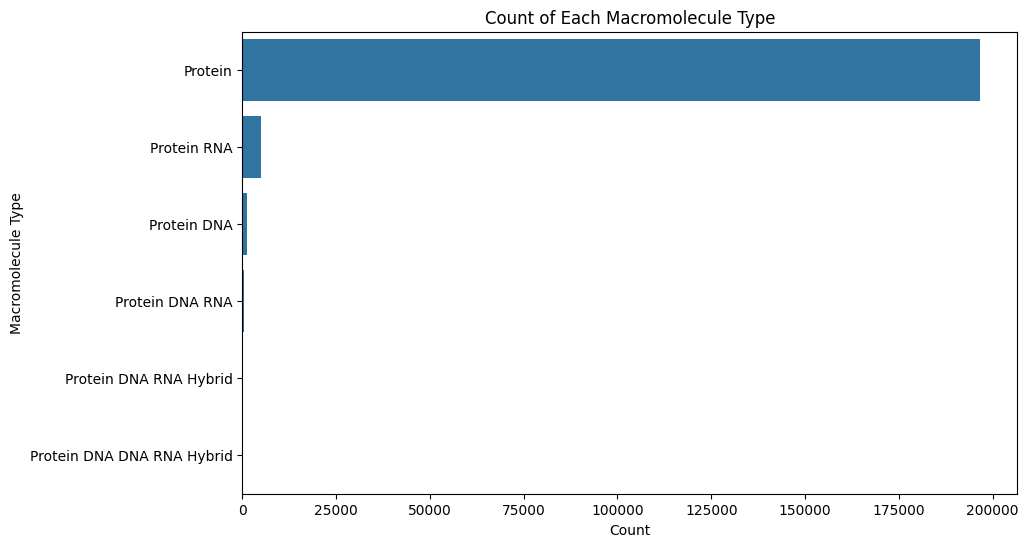

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, y='macromoleculeType', order=new_df['macromoleculeType'].value_counts().index)
plt.title("Count of Each Macromolecule Type")
plt.xlabel("Count")
plt.ylabel("Macromolecule Type")
plt.show()


The dataset is predominantly composed of protein sequences, with minimal representation of RNA- and DNA-associated macromolecules. This suggests that the classification task primarily focuses on protein-level variations rather than multi-macromolecular interactions.

**1. EDA for Primary Sequences**

In [ ]:
# Add sequence length to the dataframe
new_df['sequence_length'] = new_df['sequence'].apply(len)

In [ ]:
classes = new_df['classification'].unique()
num_classes = len(classes)

**1.1 Average Sequence Length Distribution Across Class**

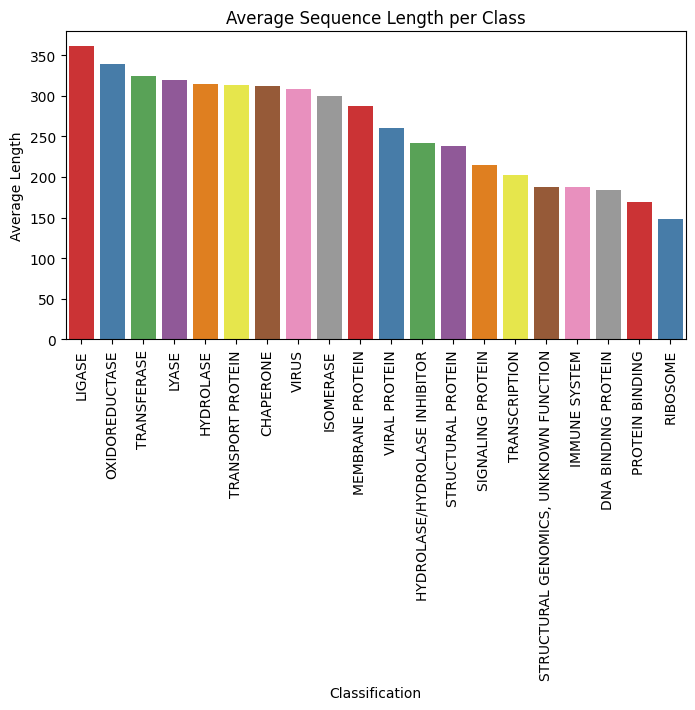

In [ ]:
avg_length = new_df.groupby('classification')['sequence_length'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_length.index, y=avg_length.values, hue=avg_length.index, palette='Set1', legend=False)
plt.title('Average Sequence Length per Class')
plt.xlabel('Classification')
plt.ylabel('Average Length')
plt.xticks(rotation=90)
plt.show()

The average sequence length varies across protein classes, with ligases, oxidoreductases, and transferases having the longest sequences, while ribosomal and DNA-binding proteins have the shortest. This variation may reflect functional differences, as longer sequences often correspond to complex enzymatic roles, whereas shorter sequences may be structurally constrained or functionally minimal. The highest average sequence length is more than 350 amino acids (ligase proteins), which serves as the maximum length for padding to maintain uniform input sizes while preserving biological relevance.

**1.2 Class-wise Sequence Length Distribution**

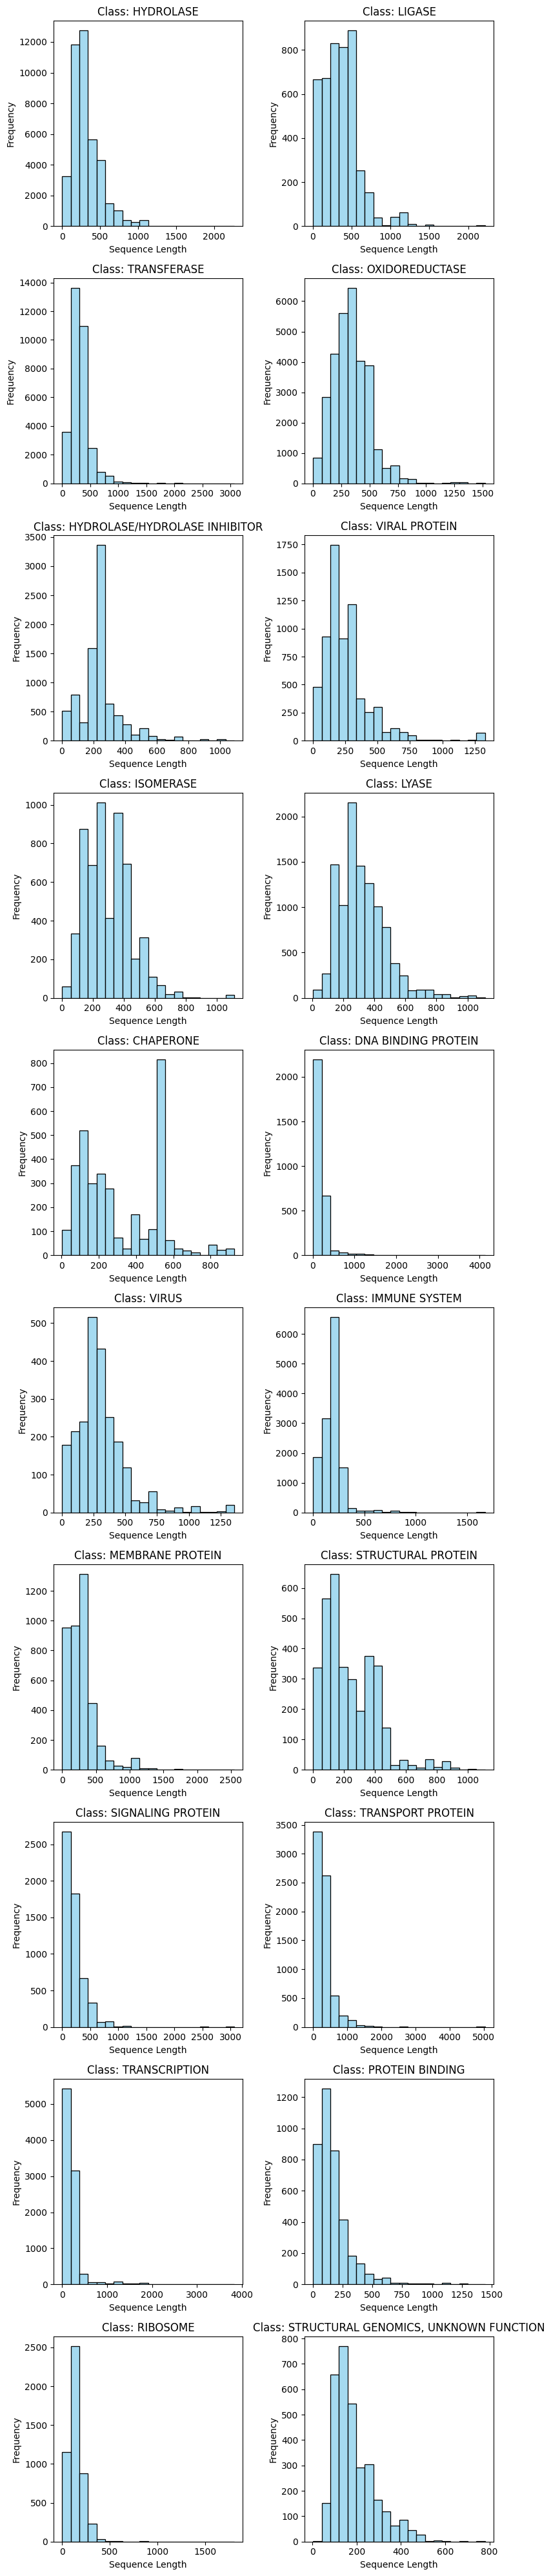

In [ ]:
# Set up subplots grid
fig, axes = plt.subplots(nrows=(num_classes + 1) // 2, ncols=2, figsize=(8, 4 * ((num_classes + 1) // 2)))
axes = axes.flatten()  # Flatten for easier indexing

for i, cls in enumerate(classes):
    sns.histplot(
        data=new_df[new_df['classification'] == cls],
        x='sequence_length',
        bins=20,
        color='skyblue',
        kde=False,
        ax=axes[i]  # Plot in corresponding subplot
    )
    axes[i].set_title(f'Class: {cls}')
    axes[i].set_xlabel('Sequence Length')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

The sequence length distribution across classes shows high variability (0 to 2000+), with a significant number of sequences clustering around 350 amino acids, indicating a common length range for many protein types.

**1.3 Amino Acid Composition Across All Classes**

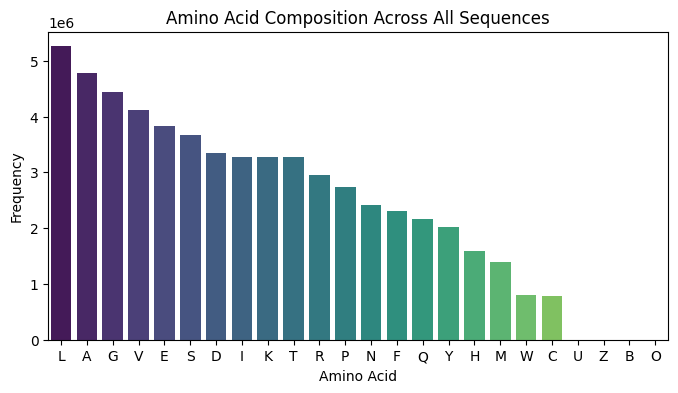

In [ ]:
# Initialize a Counter to keep track of amino acid frequencies across all sequences
total_aa_counts = Counter()

# Loop through each sequence and update the total amino acid counts
for seq in new_df['sequence']:
    aa_counts = Counter(seq)
    total_aa_counts.update(aa_counts)

# Convert the Counter to a pandas DataFrame for easier handling
aa_df = pd.DataFrame(total_aa_counts.items(), columns=['Amino Acid', 'Count'])
aa_df['hue'] = aa_df['Amino Acid']
# Sort by frequency (optional)
aa_df = aa_df.sort_values(by='Count', ascending=False)

# Plotting the amino acid composition using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Amino Acid', y='Count', data=aa_df, hue='hue', palette='viridis')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Amino Acid Composition Across All Sequences')
plt.show()


The amino acid composition across all sequences shows that Leucine (L), Alanine (A), and Glycine (G) are the most frequently occurring amino acids, suggesting their prominent role in the dataset's protein structures. Conversely, rare amino acids like Tryptophan (W) and Cysteine (C) appear much less frequently, possibly due to their specialized structural or functional roles in proteins. The presence of non-standard amino acid codes (U, Z, B, O) indicates that some sequences contain ambiguous or modified residues.

**1.4 Class-wise Amino Acid Distribution**

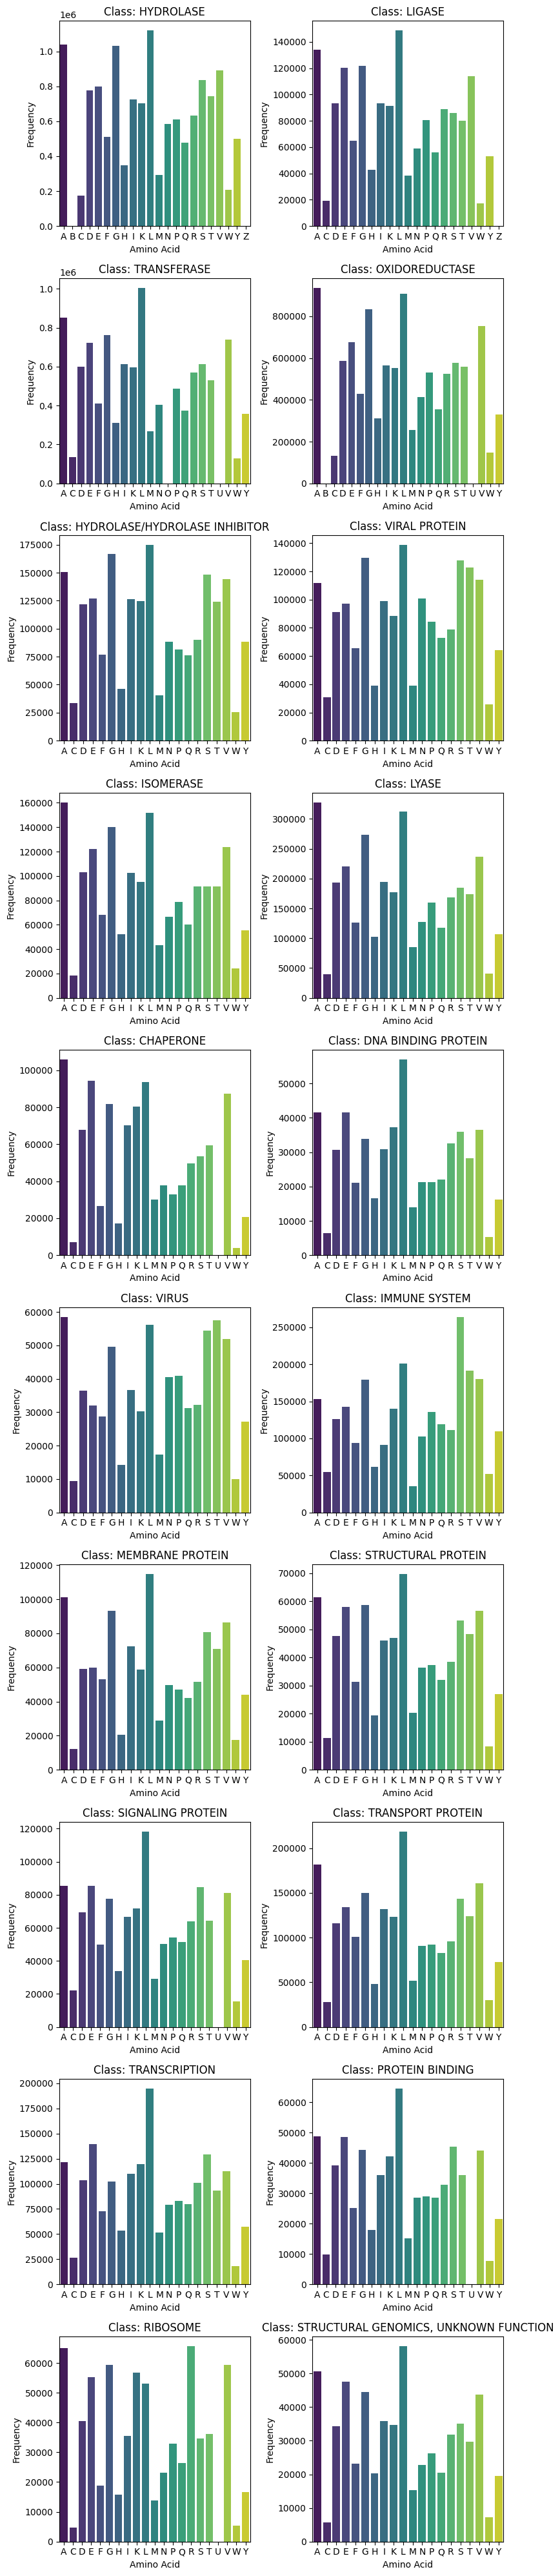

In [ ]:
# Set up subplots grid
fig, axes = plt.subplots(nrows=(num_classes + 1) // 2, ncols=2, figsize=(8, 4 * ((num_classes + 1) // 2)))
axes = axes.flatten()  # Flatten for easier indexing

# Plot amino acid distribution for each class
for idx, cls in enumerate(classes):
    all_sequences = ''.join(new_df[new_df['classification'] == cls]['sequence'].values)
    aa_counts = dict(Counter(all_sequences))

    # Convert to DataFrame for plotting
    aa_df = pd.DataFrame(list(aa_counts.items()), columns=['Amino Acid', 'Frequency']).sort_values('Amino Acid')
    aa_df['hue'] = aa_df['Amino Acid']
    sns.barplot(data=aa_df, x='Amino Acid', y='Frequency', hue='hue', palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'Class: {cls}')
    axes[idx].set_xlabel('Amino Acid')
    axes[idx].set_ylabel('Frequency')

# Remove unused subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


 **Common Patterns Across Classes**

* Almost all protein classes show highest frequencies for **L (Leucine), A (Alanine), and V (Valine)**.  
* **C (Cysteine), M (Methionine), W (Tryptophan), and Y (Tyrosine)** consistently show low frequencies across all classes.  
* **G (Glycine) and S (Serine)** typically show moderate to high frequencies.  
* **E (Glutamic acid) and K (Lysine)** show moderate representation in many classes.  


 **Uniquely Distributed Classes**

- **Immune System Proteins**: Distinctively *high frequency* of **S (Serine)** – the only class where **S exceeds L**.  
- **Transcription Proteins**: Extremely high **L (Leucine)** frequency – highest **L:A** ratio among all classes.  
- **Ribosome**: Uniquely high **R (Arginine)** frequency compared to other classes.  
- **Chaperones**: Higher **E (Glutamic acid)** representation and more even distribution across amino acids.  
- **Viral Proteins**: Higher relative frequencies of **T (Threonine)** compared to other classes.  

**Similar Class Groupings**

*Enzymatic Proteins (Hydrolases, Transferases, Oxidoreductases, Ligases)*
- Very similar distribution patterns with slight variations in absolute frequencies.  
- Strong preference for **L, A, G, and V**.  

*Membrane-Associated Proteins (Membrane Proteins, Transport Proteins)*
- Nearly identical distribution patterns.  
- High frequencies of **L, A, and V** with significant **I (Isoleucine)** representation.  

*DNA/Protein Interaction (DNA Binding Proteins, Protein Binding, Transcription)*
- Higher **K (Lysine)** and **R (Arginine)** frequencies.  
- Extremely high **L** in the **Transcription** class.  

*Structural Components (Structural Proteins, Structural Genomics)*
- More even distribution across hydrophobic amino acids.  
- Similar patterns reflecting structural roles.  

*Viral-Related (Virus, Viral Proteins)*
- Higher **S (Serine)** and **T (Threonine)** frequencies.  
- Distinctive pattern compared to host cellular proteins.

**Each class's 1-gram distribution**

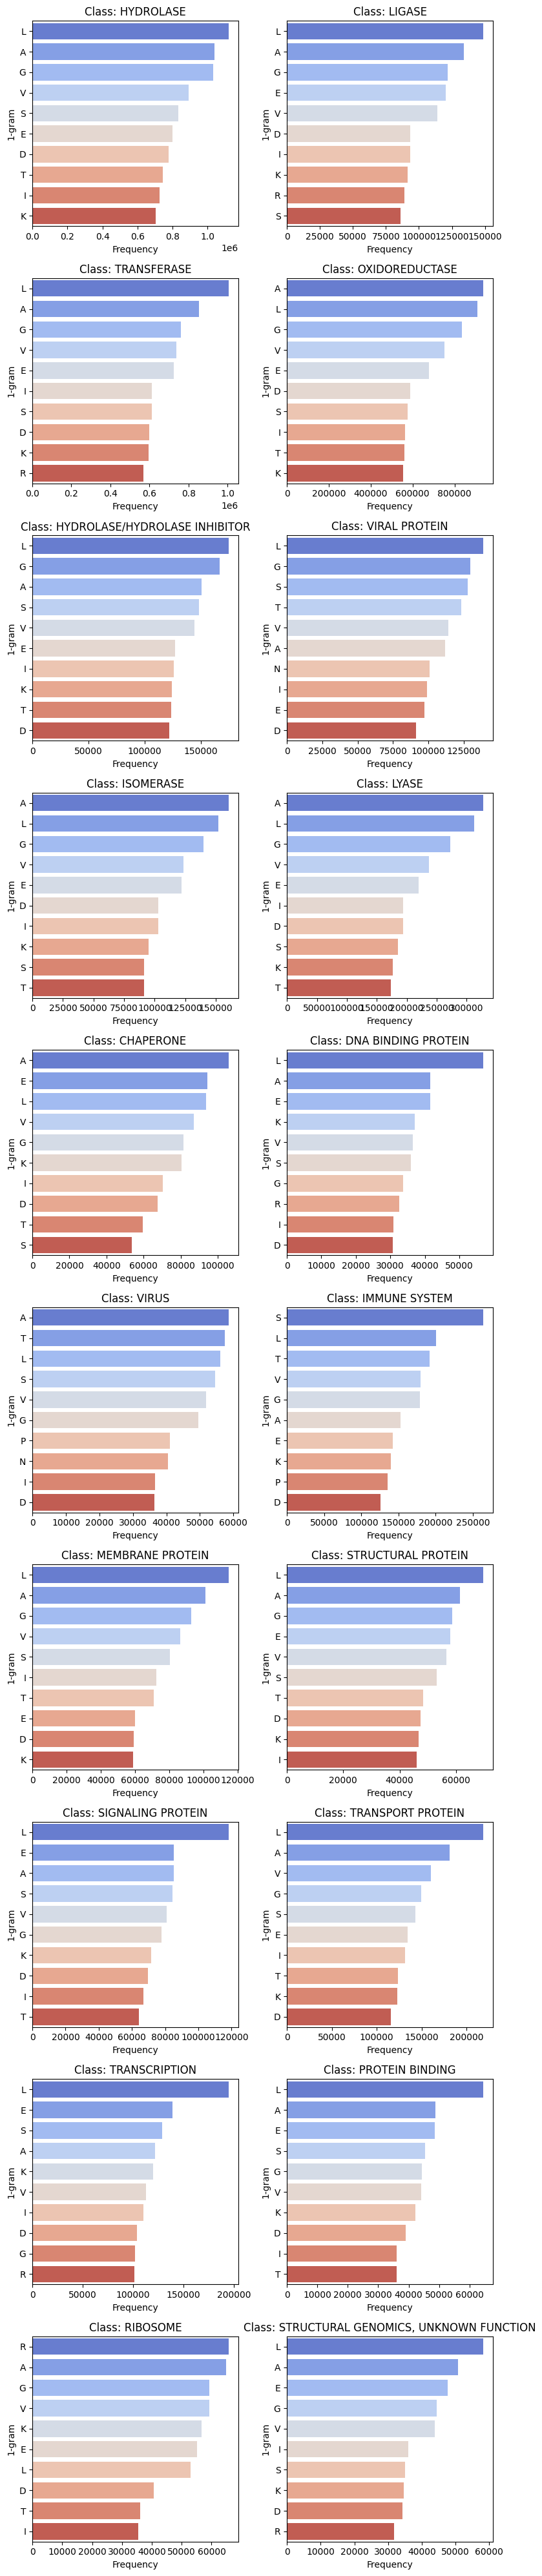

In [ ]:
# Define n-grams function
def n_grams(sequence, n):
    return [sequence[i:i+n] for i in range(len(sequence)-n+1)]

n = 1  # Example for unigrams
top_n = 10  # Top N n-grams to display
num_classes = len(classes)  # Total number of classes

# Prepare data for each class
n_gram_distributions = {}
for cls in classes:
    cls_sequences = new_df[new_df['classification'] == cls]['sequence']
    n_grams_cls = Counter()
    for seq in cls_sequences:
        n_grams_cls.update(n_grams(seq, n))
    n_gram_distributions[cls] = n_grams_cls.most_common(top_n)

# Set up subplots
fig, axes = plt.subplots(nrows=(num_classes + 1) // 2, ncols=2, figsize=(8, 4 * ((num_classes + 1) // 2)))
axes = axes.flatten()  # Flatten for easier indexing

# Plot each class's N-gram distribution
for idx, (cls, n_gram_data) in enumerate(n_gram_distributions.items()):
    n_gram_df = pd.DataFrame(n_gram_data, columns=['N-gram', 'Frequency'])
    n_gram_df['hue'] = n_gram_df['N-gram']
    sns.barplot(data=n_gram_df, y='N-gram', x='Frequency', hue='hue', palette='coolwarm', ax=axes[idx],)
    axes[idx].set_title(f'Class: {cls}')
    axes[idx].set_xlabel('Frequency')
    axes[idx].set_ylabel(f'{n}-gram')

# Remove unused subplots if any
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Top 1-grams Shared Across Multiple Classes**

1-grams present in more than one class:
N-gram: L, Classes: HYDROLASE, LIGASE, TRANSFERASE, OXIDOREDUCTASE, HYDROLASE/HYDROLASE INHIBITOR, VIRAL PROTEIN, ISOMERASE, LYASE, CHAPERONE, DNA BINDING PROTEIN, VIRUS, IMMUNE SYSTEM, MEMBRANE PROTEIN, STRUCTURAL PROTEIN, SIGNALING PROTEIN, TRANSPORT PROTEIN, TRANSCRIPTION, PROTEIN BINDING, RIBOSOME, STRUCTURAL GENOMICS, UNKNOWN FUNCTION
N-gram: A, Classes: HYDROLASE, LIGASE, TRANSFERASE, OXIDOREDUCTASE, HYDROLASE/HYDROLASE INHIBITOR, VIRAL PROTEIN, ISOMERASE, LYASE, CHAPERONE, DNA BINDING PROTEIN, VIRUS, IMMUNE SYSTEM, MEMBRANE PROTEIN, STRUCTURAL PROTEIN, SIGNALING PROTEIN, TRANSPORT PROTEIN, TRANSCRIPTION, PROTEIN BINDING, RIBOSOME, STRUCTURAL GENOMICS, UNKNOWN FUNCTION
N-gram: G, Classes: HYDROLASE, LIGASE, TRANSFERASE, OXIDOREDUCTASE, HYDROLASE/HYDROLASE INHIBITOR, VIRAL PROTEIN, ISOMERASE, LYASE, CHAPERONE, DNA BINDING PROTEIN, VIRUS, IMMUNE SYSTEM, MEMBRANE PROTEIN, STRUCTURAL PROTEIN, SIGNALING PROTEIN, TRANSPORT PROTEIN, TRANSCRIPTION,

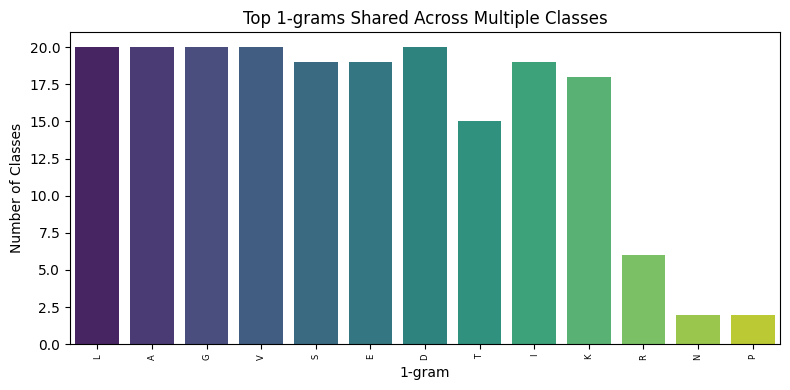

In [ ]:
from collections import defaultdict

# Collect all top n-grams and their classes
n_gram_to_classes = defaultdict(list)

# Find top n-grams for each class and the classes they belong to
for cls, n_grams_list in n_gram_distributions.items():
    for n_gram, _ in n_grams_list:
        n_gram_to_classes[n_gram].append(cls)

# Filter for n-grams present in more than one class
common_n_grams = {k: v for k, v in n_gram_to_classes.items() if len(v) >= 1}

# Print the results
print("1-grams present in more than one class:")
for n_gram, cls_list in common_n_grams.items():
    print(f"N-gram: {n_gram}, Classes: {', '.join(cls_list)}")

# Prepare data for plotting
plot_data = pd.DataFrame([(n_gram, len(cls_list)) for n_gram, cls_list in common_n_grams.items()],
                         columns=['N-gram', 'Number of Classes'])
plot_data['hue'] = plot_data['N-gram']

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=plot_data, x='N-gram', y='Number of Classes', hue='hue', palette='viridis')
plt.title('Top 1-grams Shared Across Multiple Classes')
plt.xlabel('1-gram')
plt.ylabel('Number of Classes')
plt.xticks(rotation='vertical', fontsize=6)
plt.tight_layout()
plt.show()

**2. EDA for Secondary Sequences**

**2.1 State Distribution Across All Classes**


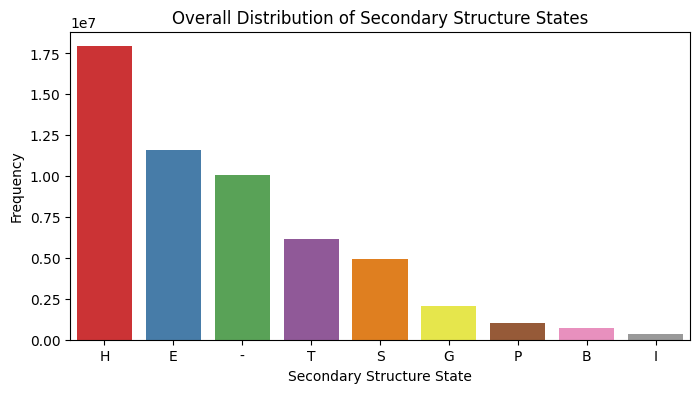

In [ ]:
all_states = ''.join(new_df['original_secondary_structure'])
state_counts = Counter(all_states)

# Convert to DataFrame for visualization
state_df = pd.DataFrame(state_counts.items(), columns=['State', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=state_df['State'], y=state_df['Count'], hue=state_df['State'], palette='Set1', legend=False)
plt.title('Distribution of Secondary Structure States')
plt.xlabel('Secondary Structure State')
plt.ylabel('Frequency')
plt.title('Overall Distribution of Secondary Structure States')
plt.show()

**Inferences**
* Helices (H) dominate the dataset, indicating that α-helices are the most common structural motif. This aligns with their key roles in membrane proteins, enzymes, and transcription factors.

* β-Strands (E) and Coils (-) follow as major contributors, suggesting a significant presence of β-sheet-rich proteins and flexible, disordered regions.

* Turns (T) and Bends (S) show moderate representation, reinforcing their role in protein folding and stability.

* Less frequent structural states (G, P, B, I) indicate rare conformations, with π-helices (P) and isolated β-bridges (I) being the least common, reflecting their limited biological presence.





**2.2 Class-wise State Distribution**

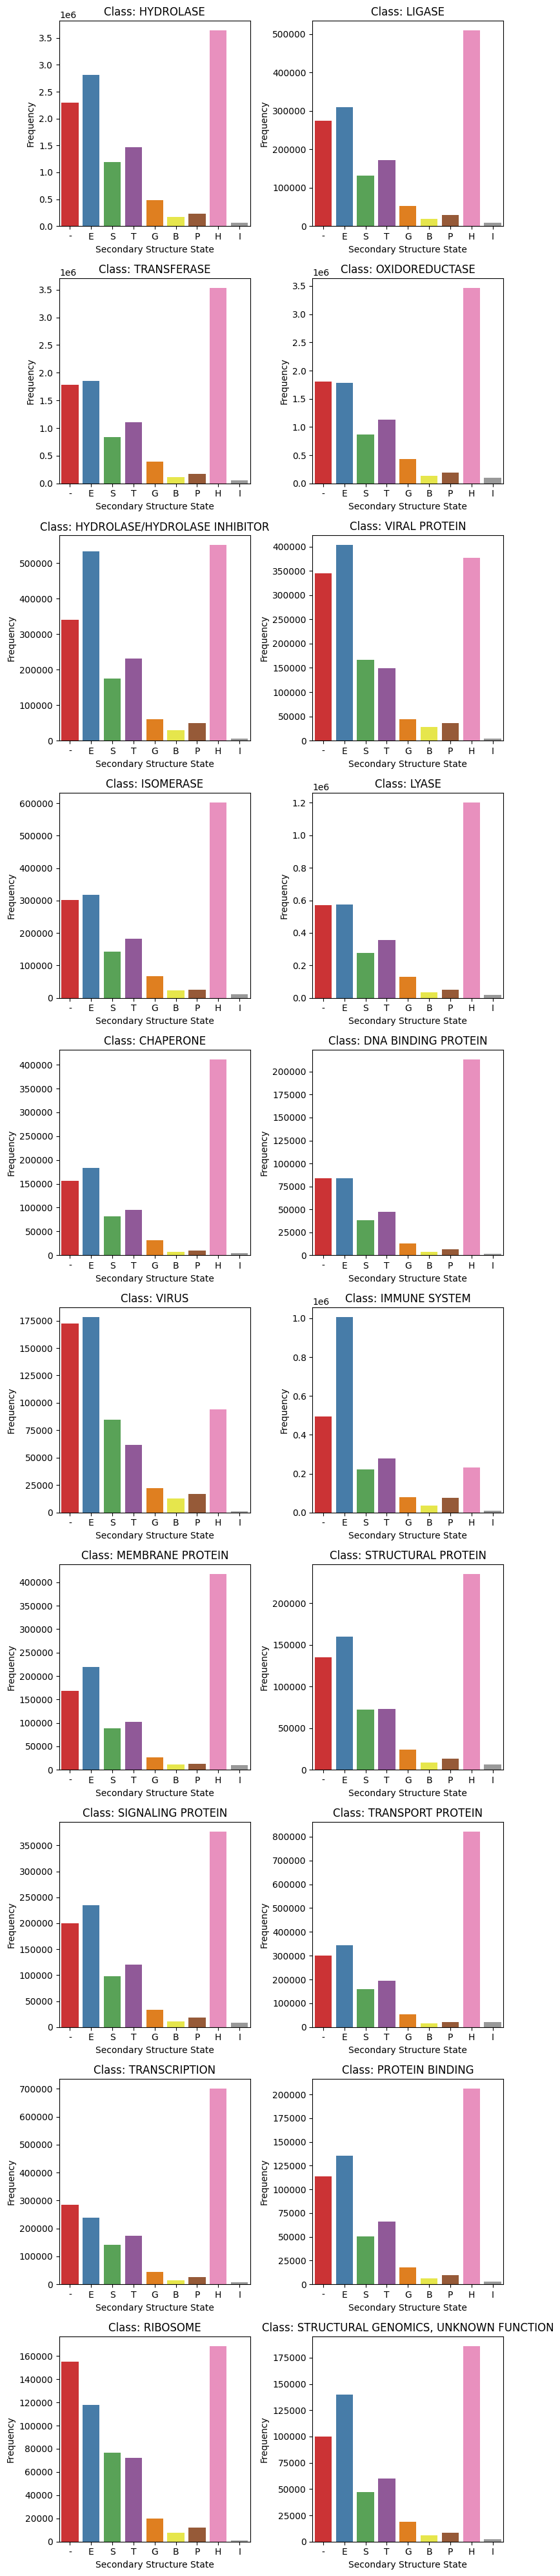

In [ ]:
# Function to count state occurrences per class
def count_states_by_class(df, class_col='classification', seq_col='original_secondary_structure'):
    classwise_counts = {}
    for cls in df[class_col].unique():
        class_states = ''.join(df[df[class_col] == cls][seq_col])
        classwise_counts[cls] = Counter(class_states)

    return pd.DataFrame(classwise_counts).fillna(0).astype(int)

# Get state distribution for each class
state_class_df = count_states_by_class(new_df)

# Set up subplots grid
fig, axes = plt.subplots(nrows=(num_classes + 1) // 2, ncols=2, figsize=(8, 4 * ((num_classes + 1) // 2)))
axes = axes.flatten()  # Flatten for easier indexing

# Generate bar plots for each class
for i, cls in enumerate(state_class_df.columns):
    sns.barplot(x=state_class_df.index, y=state_class_df[cls], hue=state_class_df.index, palette='Set1', ax=axes[i], legend=False)
    axes[i].set_title(f'Class: {cls}')
    axes[i].set_xlabel('Secondary Structure State')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()